# 3.6 Exploratory Data Analysis

In [1]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

84125825/84125825 [==============================] - 10s 0us/step


In [3]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [4]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

In [5]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [6]:
train_df.head()

,review,sentiment
0,"In Cinema Retro magazine #2,it is revealed tha...",1
1,I noticed this movie was getting trashed well ...,1
2,"In my opinion, October Sky is one of the best ...",1
3,Louise Brooks gives a wonderful performance in...,1
4,"At first, I thought the Ring would be a more t...",1


In [10]:
reviews = list(train_df['review'])
print(reviews[0])

In Cinema Retro magazine #2,it is revealed that Mark Lester's voice was actually dubbed by a 20 year old female, Kathe Green. Although Leste was considered perfect for the title role, director Carol Reed was not at all pleased with his singing abilities. The secret was revealed by on a 2004 UK documentary titled "Oliver! After They Were Famous". Greene was paid 400 pounds for her work and she had to agree to keep her participation secret, as did Mark Lester. They kept their word and only revealed this fact as part of the TV show decades after release of the film. For the record, Mark Lester retired from acting and is a practicing osteopath in England.


In [11]:
# 문자열 문장 리스트를 토크나이징
tokenized_reviews = [r.split() for r in reviews]

# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

# 토크나이징된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

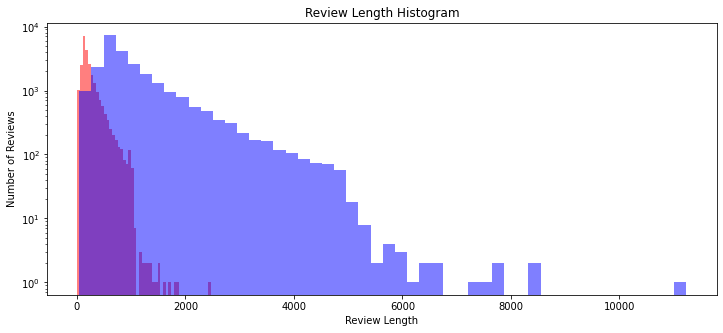

In [12]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [13]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fce0cb95b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce0cb7c220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fce0cb957c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fce0cb7c8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fce0cb7cf40>],
 'means': [<matplotlib.lines.Line2D at 0x7fce0cb7cbe0>]}

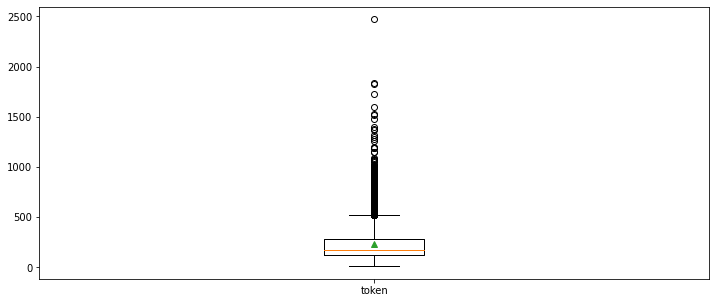

In [14]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fce0cb56fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fce0cb616a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fce0cb56c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fce0cb61d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fce0cb6c400>],
 'means': [<matplotlib.lines.Line2D at 0x7fce0cb6c0a0>]}

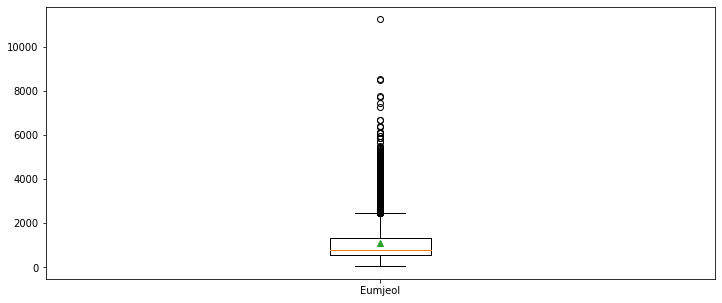

In [15]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

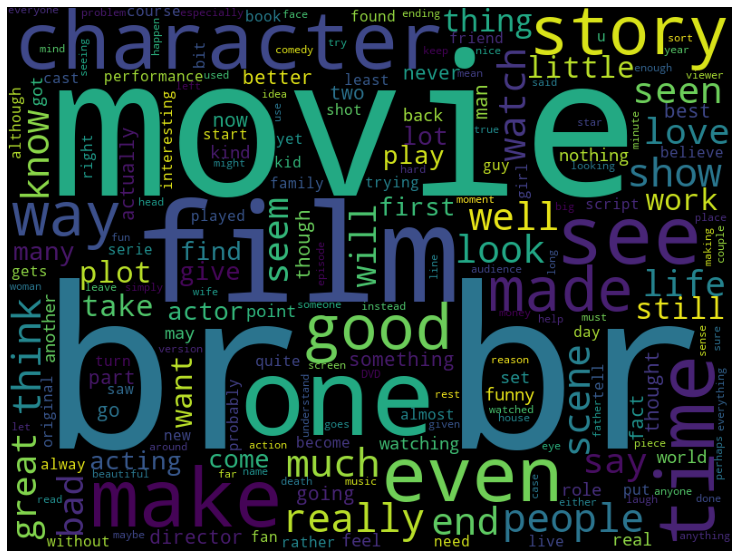

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(
    stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600
    ).generate(' '.join(train_df['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


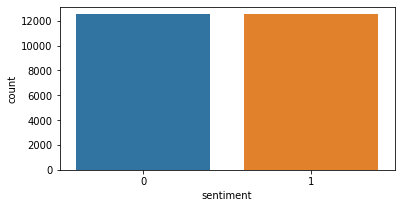

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])